In [1]:
using Pkg
Pkg.activate("SchrodingerEquationSolver")
include("SchrodingerEquationSolver.jl")

  Activating new project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver/src/SchrodingerEquationSolver`


Main.SchrodingerEquationSolver

In [2]:
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.EigenvalueFinders as EigenvalueFinders

In [3]:
using Plots

In [4]:
r_min::Float64=-6.0;
r_max::Float64=6.0;
N=10000;
Z::Int64=1;
l::Int64=0;
w::Float64=1;
m::Float64=1;


In [5]:
#grid= Grids.uniform_grid(r_min, r_max, N);
#grid= ses.Grids.exponential_grid(r_max, Z);
grid= Grids.uniform_grid(r_min, r_max, N);

In [6]:

u_wave_functions_target::Vector{Vector{Float64}}= [zeros(N) for _ in 1:4];
harm_osci0::Vector{Float64}= exp.(-0.5.*abs.(grid).^2);
u_wave_functions_target[1]= MathUtils.normalize!(harm_osci0, grid);

harm_osci1::Vector{Float64}= 2*grid.*harm_osci0;
u_wave_functions_target[2]= (-1.0).*MathUtils.normalize!(harm_osci1, grid);

harm_osci2::Vector{Float64}= (4*grid.^2 .- 2).*harm_osci0;
u_wave_functions_target[3]= MathUtils.normalize!(harm_osci2, grid);

harm_osci3::Vector{Float64}= (8*grid.^3 .- 12*grid).*harm_osci0;
u_wave_functions_target[4]= (-1.0).*MathUtils.normalize!(harm_osci3, grid);

In [7]:
eigen_list_target::Vector{Float64}=[elem + 0.5 for elem in 0.0:3.0];


In [8]:



v_effe= Potentials.harmoic_oscilator_potential(w,m,grid);

In [9]:
E_max::Float64=3.7;
E_min::Float64=0.4;
E_N::Int64=200;
E_grid= Grids.uniform_grid(E_min, E_max, E_N);

In [10]:
init_valu1_fwrd, init_valu2_fwrd,
init_valu1_bwrd, init_valu2_bwrd =InitialConditions.harmoic_oscillator(grid);

In [11]:
E_intervals, bad_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid,InitialConditions.atom);
E_intervals

4-element Vector{Tuple{Float64, Float64}}:
 (0.49949748743718597, 0.5160804020100502)
 (1.4944723618090454, 1.5110552763819096)
 (2.4894472361809044, 2.506030150753769)
 (3.4844221105527637, 3.5010050251256284)

In [12]:
numb_solu::Int64= size(E_intervals)[1];
eigen_list::Vector{Float64}=zeros(numb_solu);


In [13]:
u_wave_functions::Vector{Vector{Float64}}= [zeros(N) for _ in 1:numb_solu];

In [14]:

for (i, ei_interval) in enumerate(E_intervals)
    u_temp, ei_temp= EigenvalueFinders.illinois_eigenvalue_finder(ei_interval, v_effe, grid,InitialConditions.atom);
    u_wave_functions[i]=u_temp;
    eigen_list[i]= ei_temp;
end

In [15]:
eigen_list
for (i,ei) in enumerate(eigen_list_target)
    println(abs(ei - eigen_list[i]))
end

1.731831900109171e-10
2.12825312928544e-10
1.8105561494508038e-10
2.395541542909996e-10


In [16]:
for (i, ui_wf) in enumerate(u_wave_functions_target)
    println(MathUtils.error_difference(u_wave_functions[i],ui_wf))
end

3.5776059682740614e-10
2.570961349035672e-9
1.447443890792104e-8
6.783851342441934e-8


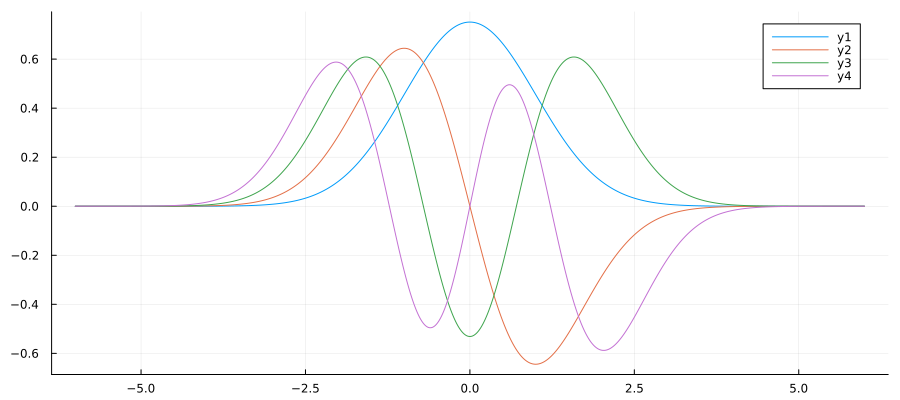

In [17]:
plot!(grid, u_wave_functions)
plot!(size=(900,400))

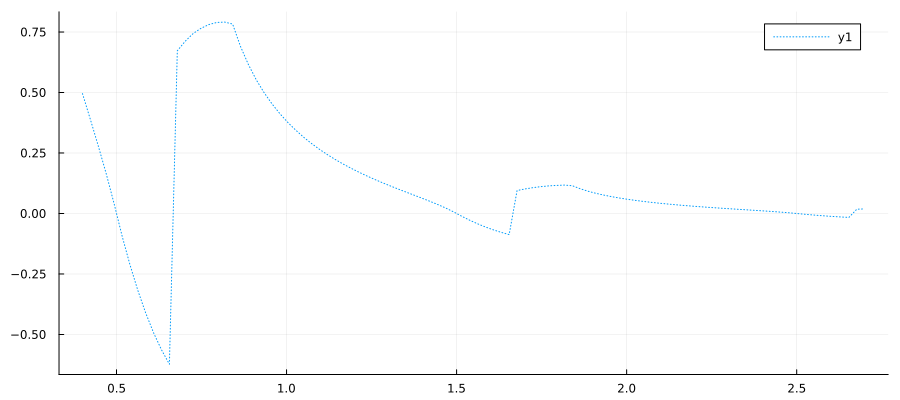

In [12]:
merg_valu_of_E=zeros(Float64, E_N);
for (i, ei) in enumerate(E_grid)
    u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
    init_valu2_bwrd, v_effe, grid);
    merg_valu_of_E[i]=merge_value;
end
plot!(E_grid, [merg_valu_of_E], ls=:dot)
plot!(size=(900,400))

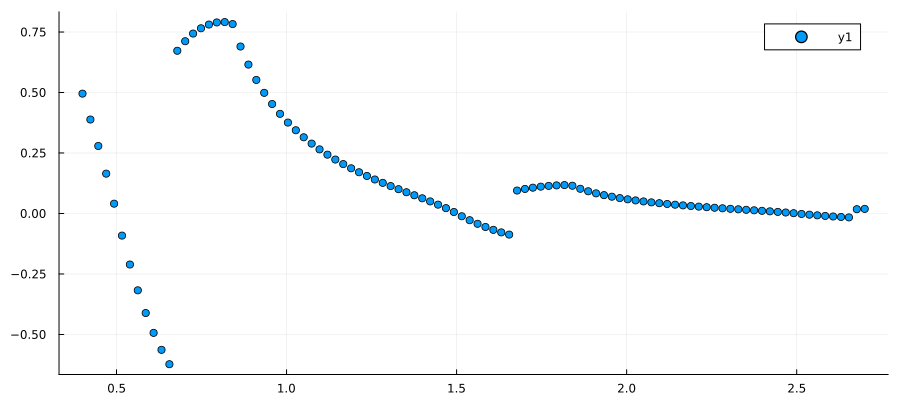

In [11]:
scatter(E_grid, [merg_valu_of_E])
plot!(size=(900,400))

In [22]:
E_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid,InitialConditions.harmoic_oscillator);
E_intervals

6-element Vector{Tuple{Float64, Float64}}:
 (0.492929292929293, 0.5161616161616163)
 (0.6555555555555557, 0.6787878787878788)
 (1.4919191919191923, 1.5151515151515151)
 (1.6545454545454548, 1.677777777777778)
 (2.490909090909091, 2.5141414141414145)
 (2.6535353535353536, 2.676767676767677)

In [46]:
for ei_interval in E_intervals
    u_merged, Ec= EigenvalueFinders.illinois_eigenvalue_finder_from_guess(ei_interval, v_effe, grid,InitialConditions.harmoic_oscillator);
    plot(grid, [u_merged])
    plot!(size=(900,400))
end

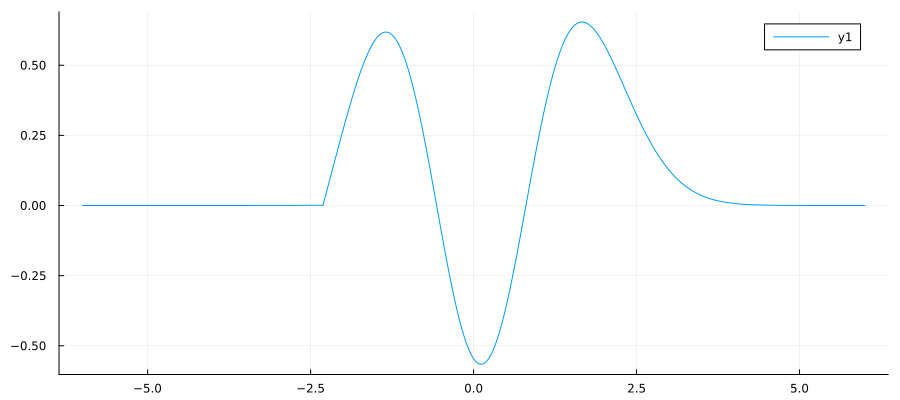

In [52]:
u_merged, Ec= EigenvalueFinders.illinois_eigenvalue_finder_from_guess(E_intervals[6], v_effe, grid,InitialConditions.harmoic_oscillator);
plot(grid, [u_merged])
plot!(size=(900,400))

In [44]:
n=100;
u_deri[n:n+3]

4-element Vector{Float64}:
 1.0971602344163908e-6
 1.1044054185733826e-6
 1.1116975542390904e-6
 1.1190369284366647e-6

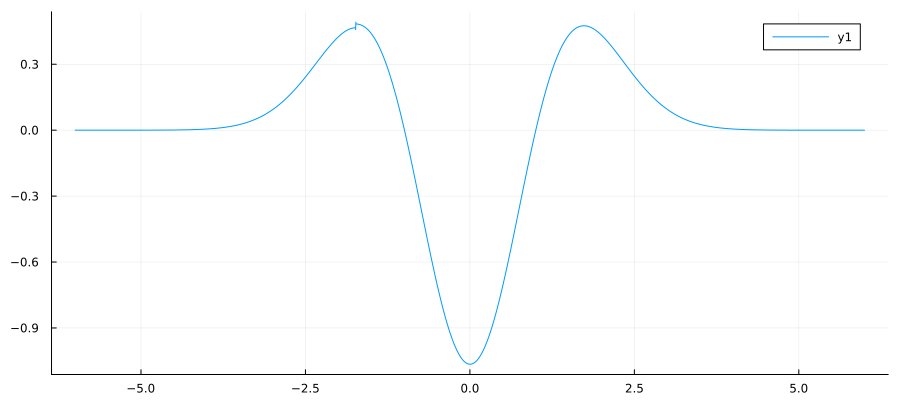

In [42]:
ei= 0.5*sum(E_intervals[3]);
u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
init_valu2_bwrd, v_effe, grid);
u_deri= MathUtils.derivative(u_merged,grid);
plot(grid[1:end-1], [u_deri])
plot!(size=(900,400))




In [27]:
u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
init_valu2_bwrd, v_effe, grid);


In [28]:
u_deri= MathUtils.derivative(u_merged,grid);


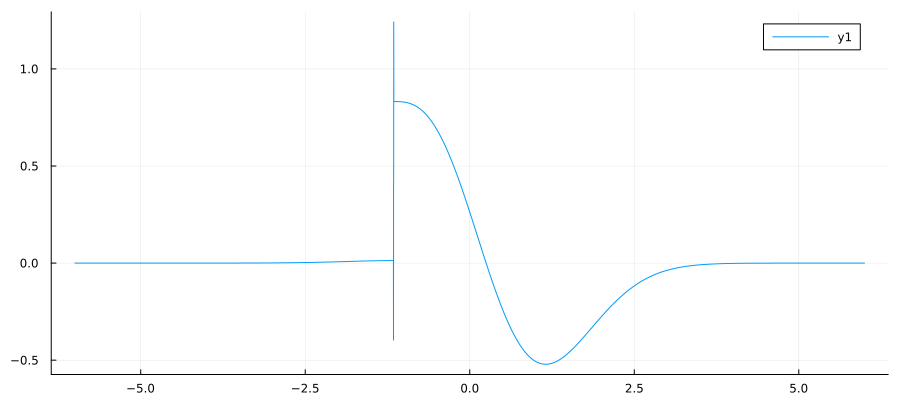

In [32]:
plot(grid[1:end-1], [u_deri])
plot!(size=(900,400))

In [30]:
u_deri

9999-element Vector{Float64}:
  2.89245632680958e-9
  2.9125091883841145e-9
  2.932699015275524e-9
  2.953026695183079e-9
  2.973493121464043e-9
  2.9940991929648673e-9
  3.0148458146761975e-9
  3.035733897035134e-9
  3.056764356363963e-9
  3.0779381147780164e-9
  ⋮
 -1.2264768887147893e-7
 -1.2180387595956548e-7
 -1.2096577569156498e-7
 -1.201333513015452e-7
 -1.193065662596992e-7
 -1.1848538425474219e-7
 -1.1766976922194719e-7
 -1.1685968531678548e-7
 -1.1605509692178798e-7

In [24]:
average(E_intervals[1])

UndefVarError: UndefVarError: average not defined

In [17]:
merg_valu_of_E=zeros(Float64, E_N);
for (i, ei) in enumerate(E_grid)
    u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
    init_valu2_bwrd, v_effe, grid);
    merg_valu_of_E[i]=merge_value;
end
plot!(E_grid, [merg_valu_of_E], ls=:dot)
plot!(size=(900,400))

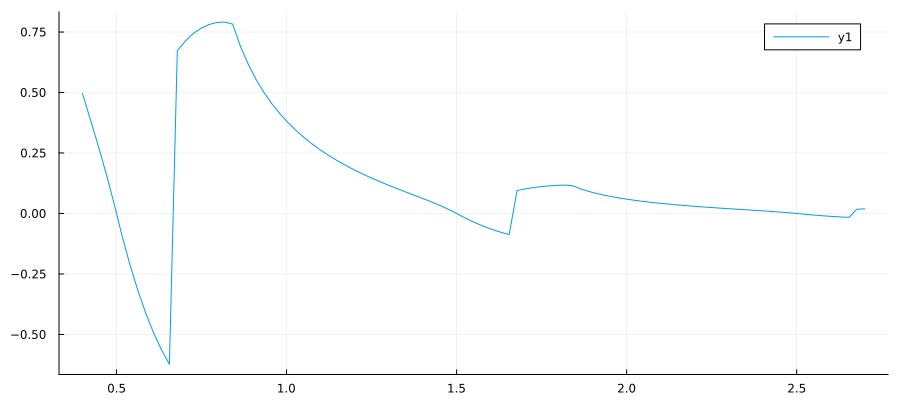

In [18]:
plot!(E_grid, [merg_valu_of_E], ls=:dot)
plot!(size=(900,400))

In [20]:
derv_merg_valu_of_E= MathUtils.derivative(merg_valu_of_E,E_grid);

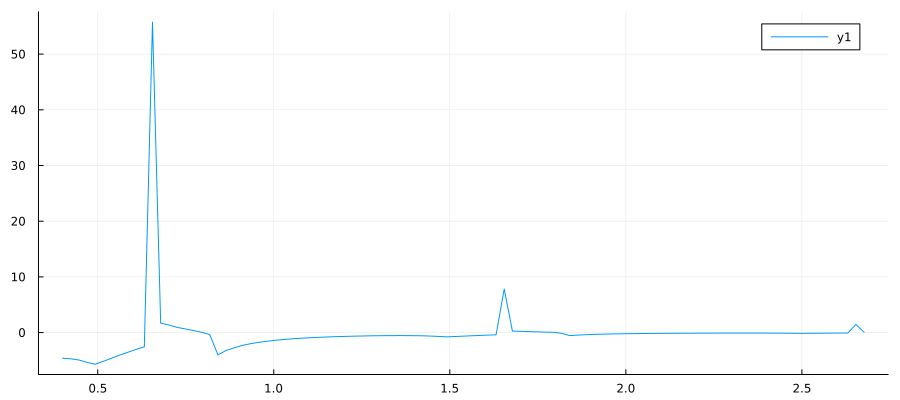

In [21]:
plot(E_grid[1:end-1], [derv_merg_valu_of_E])
plot!(size=(900,400))

In [ ]:
E_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid,InitialConditions.harmoic_oscillator);
E_intervals

In [19]:
init_valu1_fwrd, init_valu2_fwrd,
init_valu1_bwrd, init_valu2_bwrd =InitialConditions.harmoic_oscillator(grid);
u_merged, merge_value= odses.solver(0.49,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
init_valu2_bwrd, v_effe, grid);
print(merge_value)

0.05697392945172064

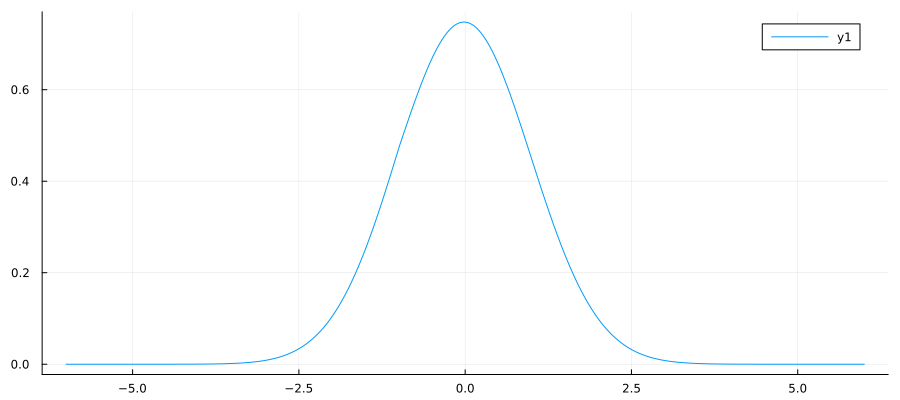

In [20]:
plot(grid, [u_merged])
plot!(size=(900,400))

In [16]:
u_merged[1]

9.262471248382366e-8

In [8]:

E_max::Float64=-0.18;
E_min::Float64=-2.2;
E_N::Int64=100;
E_grid= Grids.uniform_grid(E_min, E_max, E_N);

In [9]:
E_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid,InitialConditions.atom);
E_intervals

6-element Vector{Tuple{Float64, Float64}}:
 (-2.0163636363636366, -1.9959595959595962)
 (-1.3634343434343437, -1.3430303030303032)
 (-0.5064646464646467, -0.4860606060606063)
 (-0.44525252525252546, -0.42484848484848503)
 (-0.24121212121212143, -0.220808080808081)
 (-0.20040404040404058, -0.18000000000000016)

-0.19974590134147643

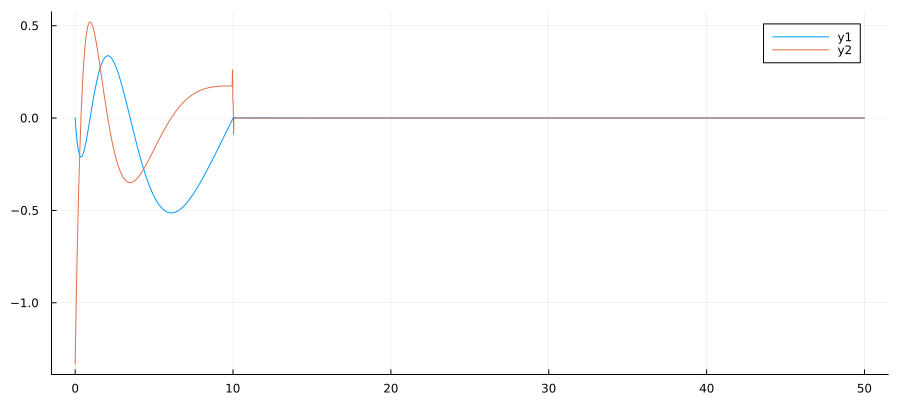

In [15]:
u, E_u= EigenvalueFinders.illinois_eigenvalue_finder_from_guess(E_intervals[6], v_effe, grid,InitialConditions.atom);
u_deri= MathUtils.derivative(u,grid);
print(E_u)
plot(grid[1:end-1], [u[1:end-1], u_deri])
plot!(size=(900,400))

-2.000001769715232

In [13]:
merg_valu_of_E=zeros(Float64, E_N);
for (i, ei) in enumerate(E_grid)
    init_valu1_fwrd, init_valu2_fwrd,
    init_valu1_bwrd, init_valu2_bwrd =InitialConditions.atom(grid, ei, l);
    u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
    init_valu2_bwrd, v_effe, grid);
    merg_valu_of_E[i]=merge_value;
end

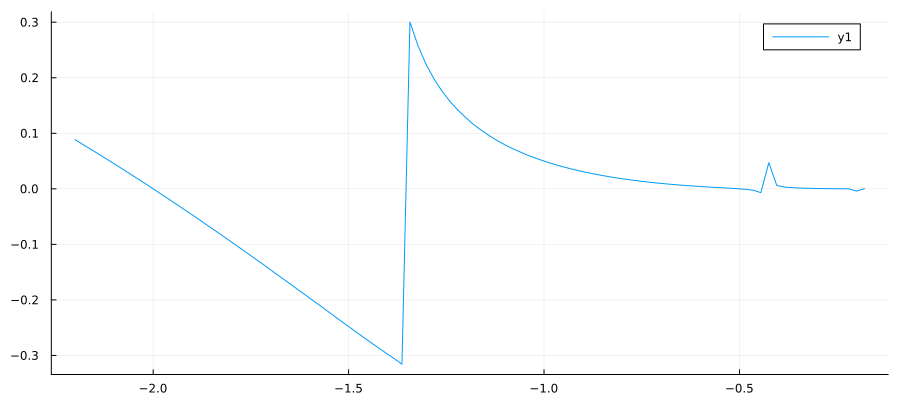

In [14]:
plot(E_grid, [merg_valu_of_E])
plot!(size=(900,400))

In [15]:
u_merged, merge_value= odses.solver(-2.0,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
    init_valu2_bwrd, v_effe, grid);
print(merge_value)
plot(grid, [u_merged])
plot!(size=(900,400))

UndefVarError: UndefVarError: init_valu1_fwrd not defined

0.0

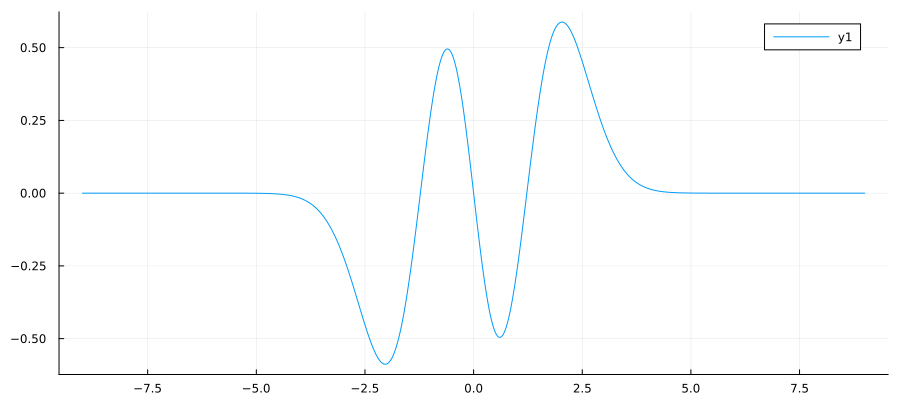

In [19]:
u_merged, merge_value= odses.solver(3.500000,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
    init_valu2_bwrd, v_effe, grid);
print(merge_value)
plot(grid, [u_merged])
plot!(size=(900,400))

In [19]:
E_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid,InitialConditions.harmoic_oscillator);
E_intervals

6-element Vector{Tuple{Float64, Float64}}:
 (0.492929292929293, 0.5161616161616163)
 (0.6555555555555557, 0.6787878787878788)
 (1.4919191919191923, 1.5151515151515151)
 (1.6545454545454548, 1.677777777777778)
 (2.490909090909091, 2.5141414141414145)
 (2.6535353535353536, 2.676767676767677)

In [13]:
E_intervals

4-element Vector{Tuple{Float64, Float64}}:
 (0.48187919463087253, 0.5053691275167785)
 (0.8342281879194631, 0.8577181208053692)
 (2.4785234899328863, 2.5020134228187922)
 (2.830872483221477, 2.854362416107383)

In [13]:
E_intervals[1]

(0.4842105263157894, 0.5105263157894737)

In [12]:
merg_valu_of_E=zeros(Float64, E_N);
for (i, ei) in enumerate(E_grid)
    u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
    init_valu2_bwrd, v_effe, grid);
    merg_valu_of_E[i]=merge_value;
end

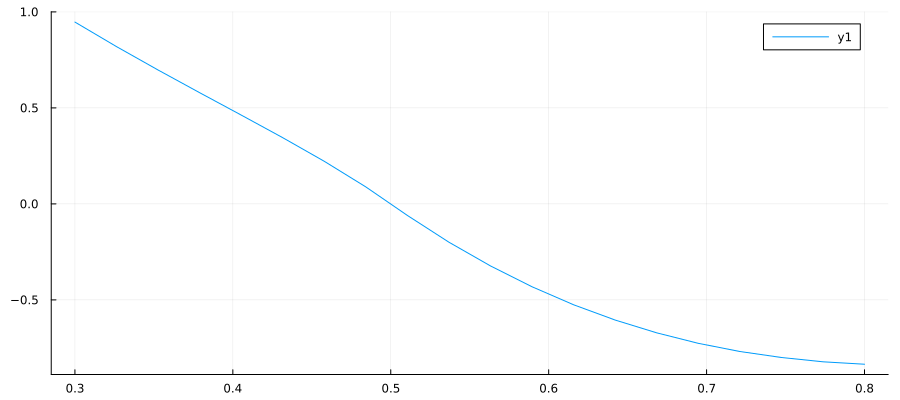

In [13]:
plot(E_grid, [merg_valu_of_E])
plot!(size=(900,400))

In [14]:
ener_indx= MathUtils.indices_of_zeros_finder(merg_valu_of_E);

In [17]:
typeof(ener_indx)

Vector{Int64} (alias for Array{Int64, 1})

In [15]:
merg_valu_of_E[ener_indx[1]]

0.08831412068297839

In [16]:
merg_valu_of_E[ener_indx[1]+1]

-0.06029008292940108

In [9]:
E::Float64= 0.5000;
init_valu1_fwrd, init_valu2_fwrd,
init_valu1_bwrd, init_valu2_bwrd =InitialConditions.harmoic_oscillator(grid);

In [10]:
u_merged, merge_value= odses.solver(E,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
                                    init_valu2_bwrd, v_effe, grid);

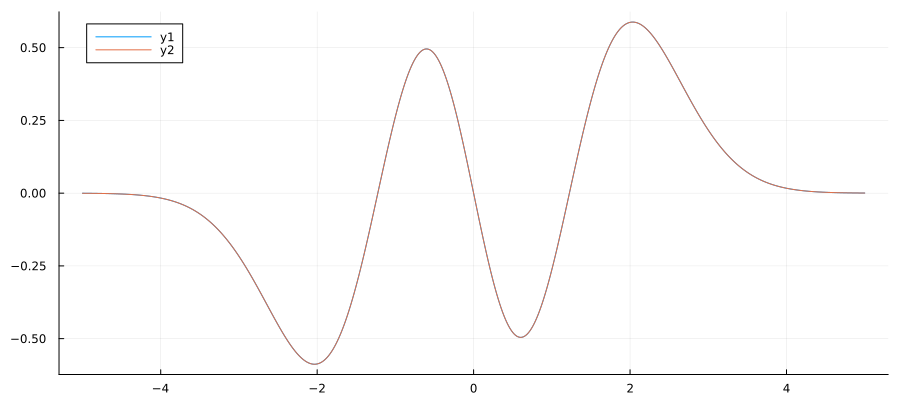

In [11]:
plot(grid, [u_merged, harm_osci3])
plot!(size=(900,400))

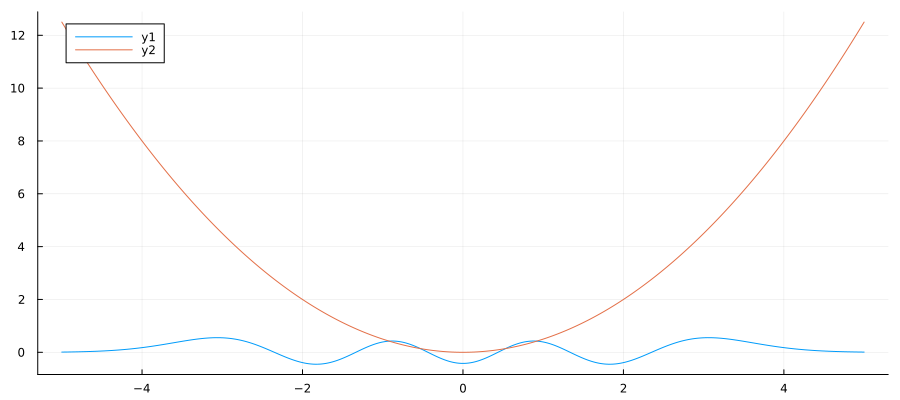

In [24]:
plot(grid, [u_merged, v_effe])
plot!(size=(900,400))

In [8]:
E::Float64= -0.125000;
l::Int64=0;

v_angu= Potentials.angular_potential(l, grid);

init_valu1_fwrd::Float64=grid[1]^(l+1.0)#u_s1_hydr_norm[1];
init_valu2_fwrd::Float64=grid[2]^(l+1.0) #u_s1_hydr_norm[2];
if sign(E) < 0.0
    lambda= (-2.0*E)^0.5;
else
    lambda= (2.0*E)^0.5;
end
init_valu1_bwrd::Float64=grid[end]*exp(-1.0*lambda*grid[end]);#u_s1_hydr_norm[end];
init_valu2_bwrd::Float64=grid[end-1]*exp(-1.0*lambda*grid[end-1]);#u_s1_hydr_norm[end-1];
v_effe= v_colu + v_angu;



In [9]:
u_merged, merge_value= odses.solver(E,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
                                    init_valu2_bwrd, v_effe, grid);

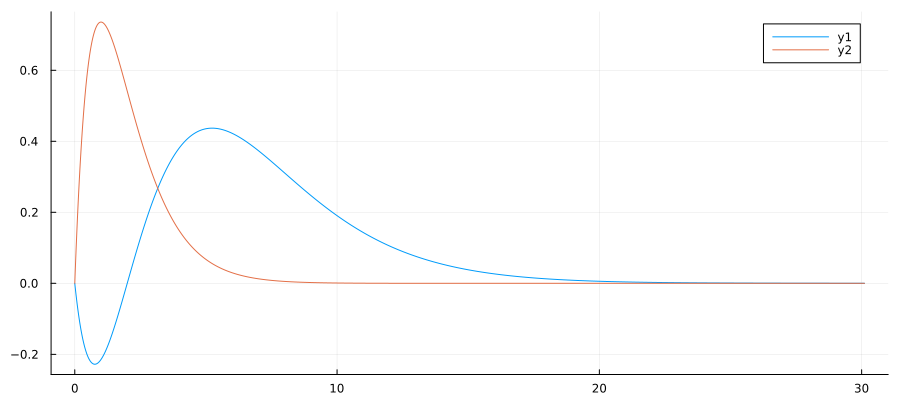

In [10]:
plot(grid, [u_merged, u_s1_hydr_norm])
plot!(size=(900,400))

In [12]:
temp= ((u_merged .- u_s1_hydr_norm).^2).^0.5;
sum(temp)/length(temp)

1.1920803723996946e-7

In [12]:
temp= ((u_merged .- u_s1_hydr_norm).^2).^0.5;
sum(temp)/length(temp)

1.5030983009662665e-7

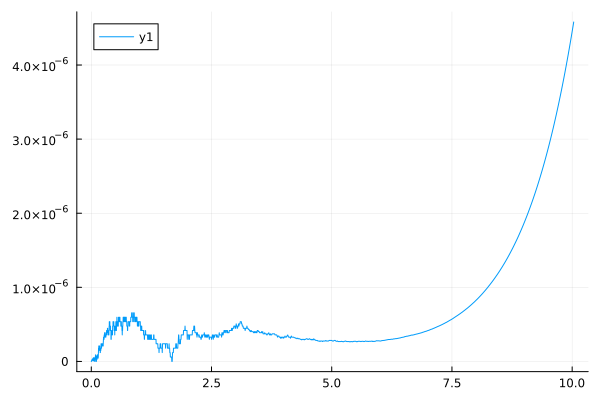

In [12]:
plot(grid, ((u_merged .- u_s1_hydr_norm).^2).^0.5)

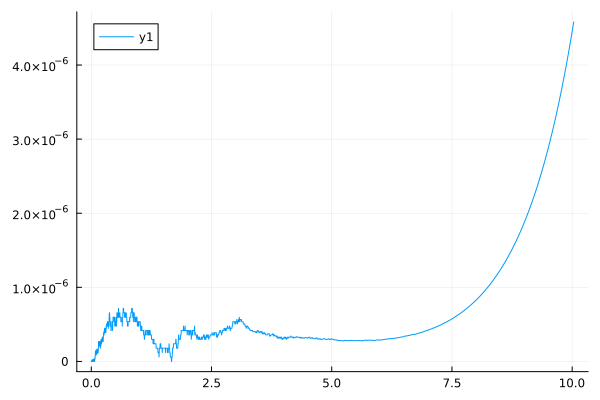

In [20]:
plot(grid, ((u_merged .- u_s1_hydr_norm).^2).^0.5)

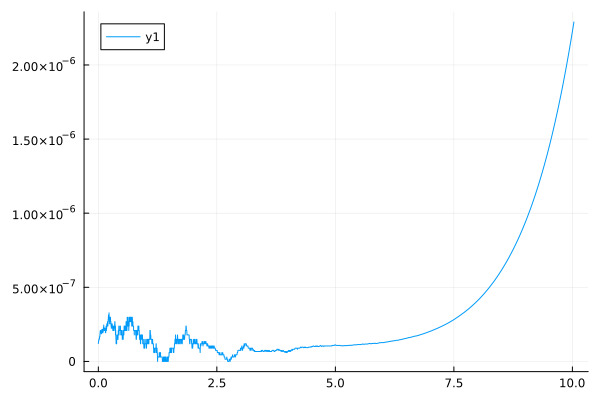

In [25]:
plot(grid, ((u_bwd .- u_s1_hydr).^2).^0.5)

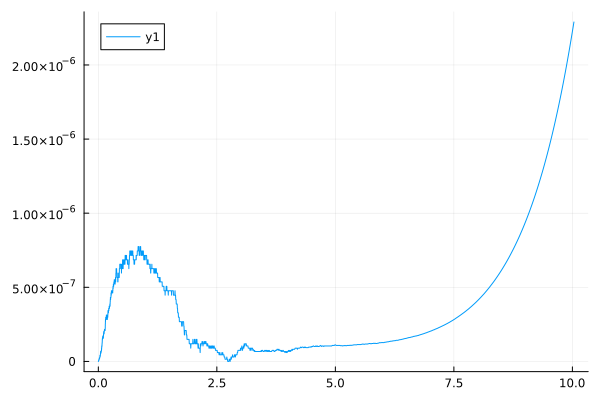

In [26]:
plot(grid, ((u_merged .- u_s1_hydr).^2).^0.5)

In [28]:
temp= ((u_merged .- u_s1_hydr).^2).^0.5;
sum(temp)/length(temp)

In [33]:
sum(temp)/length(temp)

1.3244958244185126e-7

In [34]:
sum(temp)/length(temp) < 1.325e-7

true

In [ ]:
include("tests/tests_u_s1_hydrogen")

In [31]:
#parameters needed to solve equation
E= -0.5000;
l=0;
v_effe= v_colu;
y_1=u_s1_hydr[1];#grid[1]^(l+1.0)
y_2=u_s1_hydr[2];#grid[2]^(l+1.0)
grid=grid;
g0=zeros(Float64, 6)
g1=zeros(Float64, 6)
f0=ones(Float64, 6)
f1= 2.0.*(v_effe .- E);

N=size(v_effe)[1];

y0=zeros(Float64, N);#solution to differential equation
y1=zeros(Float64, N);#first derivative of solution to differential equation
y0[1]= y_1;
y1[1]= (y_2 - y_1)/(grid[2]-grid[1]);

for i in 1:4
#for i in 1:(N-1)
    h= grid[i+1] - grid[i];
    y0[i+1], y1[i+1]= IntegralNumericalMethods.RK4(g1,f1[i:i+1],y0[i], y1[i],h);
end
#integration loop using prediction correction adams moulton degree 5
for i in 6:N
    h= grid[i] - grid[i-1];
    y0[i], y1[i]= IntegralNumericalMethods.PCABM5(g1,f1[i-5:i],
                                            y0[i-5:i-1], y1[i-5:i-1],h);
end

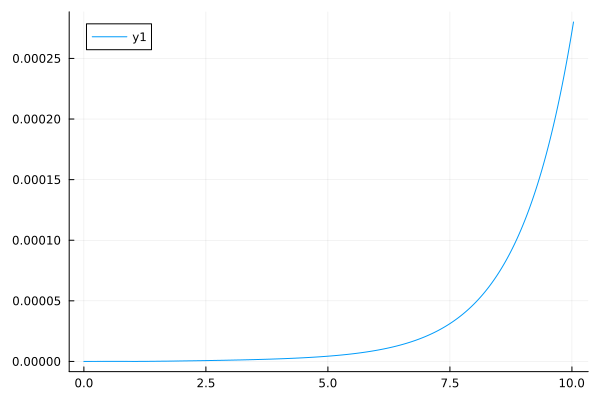

In [32]:
plot(grid, ((y0 .- u_s1_hydr).^2).^0.5)

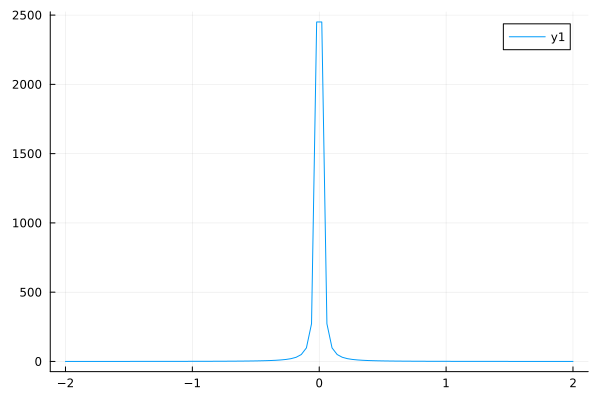

In [5]:
plot(unif_grid, v_angu)

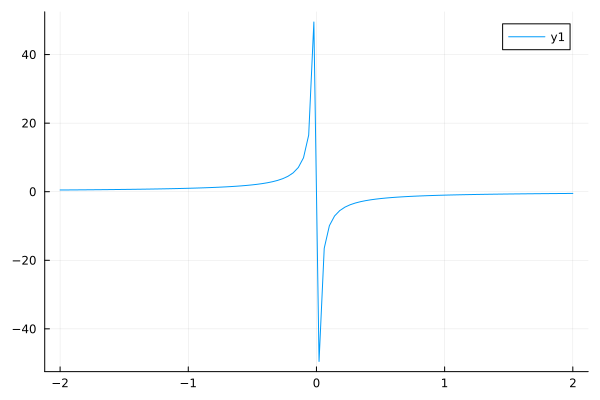

In [6]:
plot(unif_grid, v_colu)

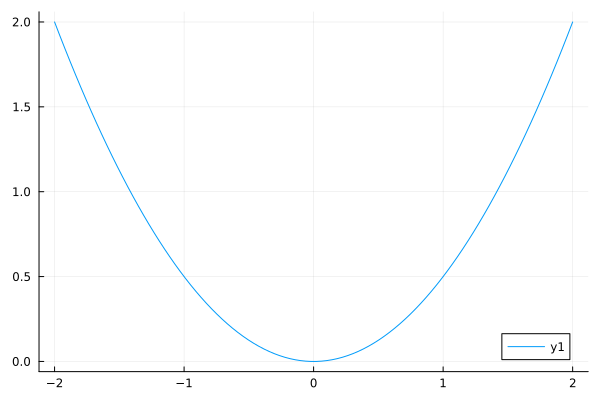

In [7]:
plot(unif_grid, v_harm)